In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

Professors notes: 

# This is an example of using Python calculate and plot the motion of a springy pendulum
The motion is calculated by integration of a set of first-order differential equations.
Order of variables in the array u[ ]:
*   0: y (pendulum length, named script-ell in the assignment)  $\ell$ 
*   1: dy/dt $\frac{dy}{dt}$ = $\frac{d\ell}{dt}$
*   2: phi (pendulum angle, named phi in the assignment)  $\phi$ 
*   3: dphi/dt $\frac{d\phi}{dt}$

Parameters 

In [3]:
# Parameters describing the system
g = 9.8                   # acceleration of gravity in m/s^2
m = 144                   # mass
k = 36                    # spring constant
b = 7                     # unextended length of the spring

#keep these values for the hw 

Initial conditions 

In [4]:
# Assign initial conditions to the motion.
l0 = 2*b                    # initial extension of the pendulum, identical to the question in the hw 
lDot0 = 0.                  # initial rate of change of length of the pendulum
phi0 = 60*math.pi/180.      # initial angle of the pendulum, in radians, same as the hw 
phiDot0 = 0.                # initial angular velocity of the pendulum
u0 = [l0, lDot0, phi0, phiDot0]  # initial conditions for all 4 variables

Create a function to itterate the solution 

In [5]:
# This function gives the time derivative of each of the 4 variables. These follow from the
# Lagrange equations of motion, but note that it is necessary to convert the two 2nd-order
# differential equations into four 1st-order equations. 
def dudt(u, t):
    r = [0., 0., 0., 0.]
    
    r[0] = u[1] # the time derivative of l (ldot)
    
    # enter here the equation for the time derivative of dl/dt
        
    r[1] = (u[0]*(u[3]**2))+((k/m)*(b-u[0]))+(g*np.cos(u[2]))   
    
    r[2] = u[3] # the time derivative of phi
    
    # enter here the equation for the time derivative of dphi/dt 
        
    r[3] = -(g/u[0])*np.sin(u[2])-((2*u[3]*u[1])/u[0])
    return r

In [6]:
# Use the scipy odeint routine to carry out the numerical integration of the system of equations.
tau = 2.*math.pi*math.sqrt(m/k)
t0 = 0.                   # start time
t1 = 8.0*tau              # end time
N = 400                   # number of time steps

# Choose a set of time values at which to evaluate the solution y(t)
t = np.arange(t0,t1, (t1-t0)/N)

# Call the routing from scipy that does the integration
u = odeint(dudt, u0, t)

font = {'size'   : 18}
plt.rc('font', **font)

$\theta$



PLOT 

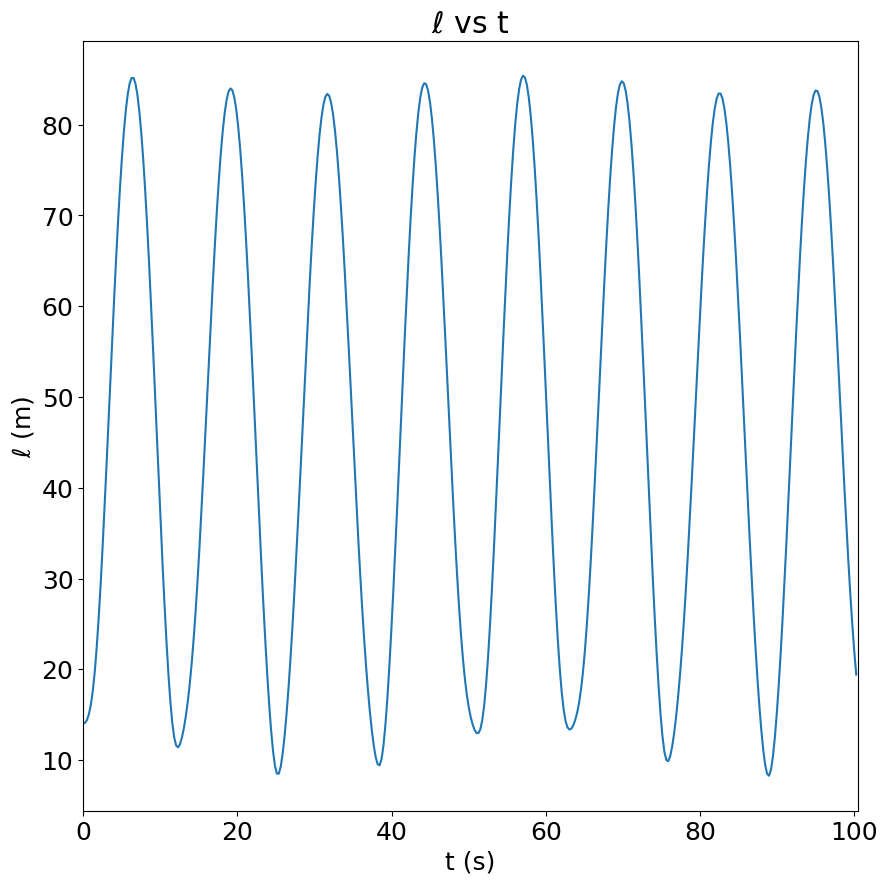

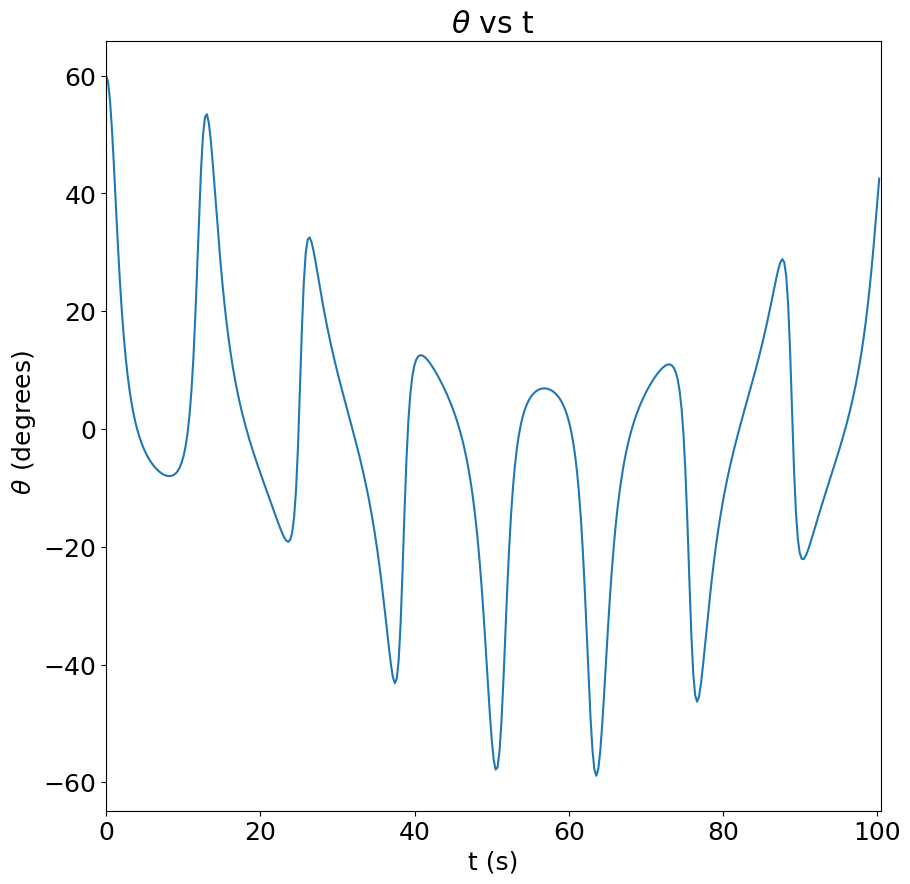

In [7]:
# Use pyplot from matplotlib to plot the motion y(t)
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel('$\ell$ (m)')
ax.plot(t,u[...,0])
plt.title(r'$\ell$ vs t ')
# plt.savefig('l(t)k.png')
plt.show()


# Plot the motion theta(t)
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel(r' $\theta $ (degrees)')
ax.plot(t,u[...,2]*180./math.pi)
plt.title(r'$\theta$ vs t ')
# plt.savefig('theta(t)k.png')
plt.show()

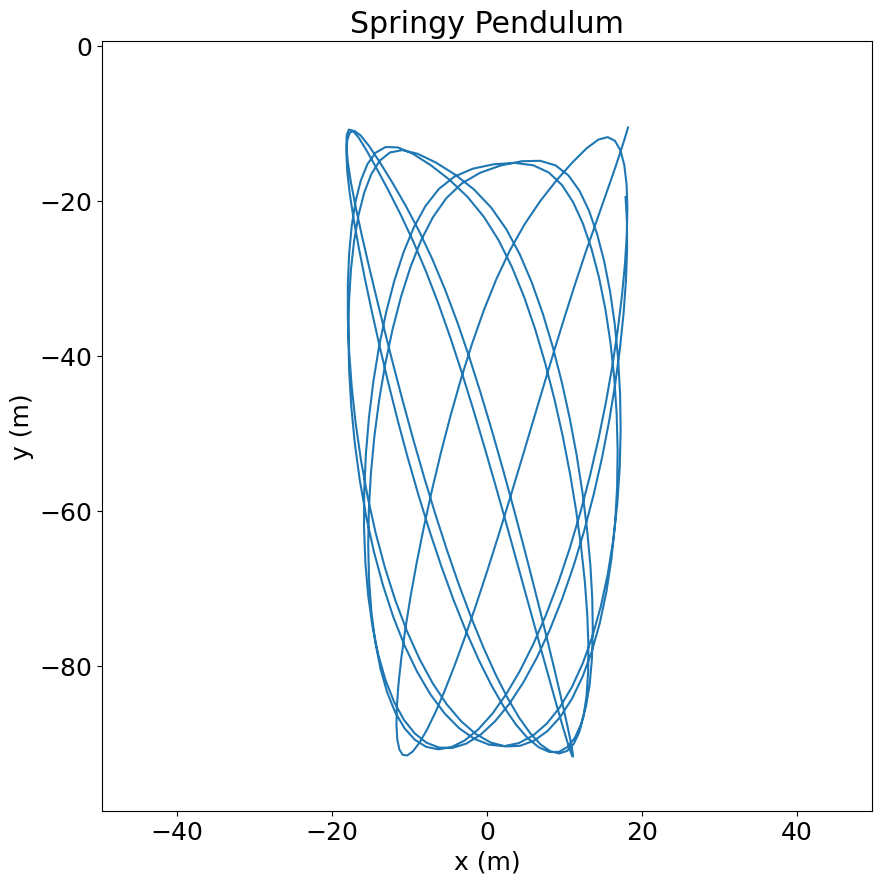

In [8]:
# Calculate and plot the 2D trajectories of the masses
X = np.zeros(N)
Y = np.zeros(N)
for i in range(N):
    X[i] = (b+u[i,0])*math.sin(u[i,2])
    Y[i] = -(b+u[i,0])*math.cos(u[i,2])
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-7.1*b, 7.1*b)
plt.ylim(-7.1*b-7*b, 7.1*b-7*b)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect('equal')
plt.title("Springy Pendulum")
ax.plot(X,Y)
# plt.savefig('springk.png')
plt.show()


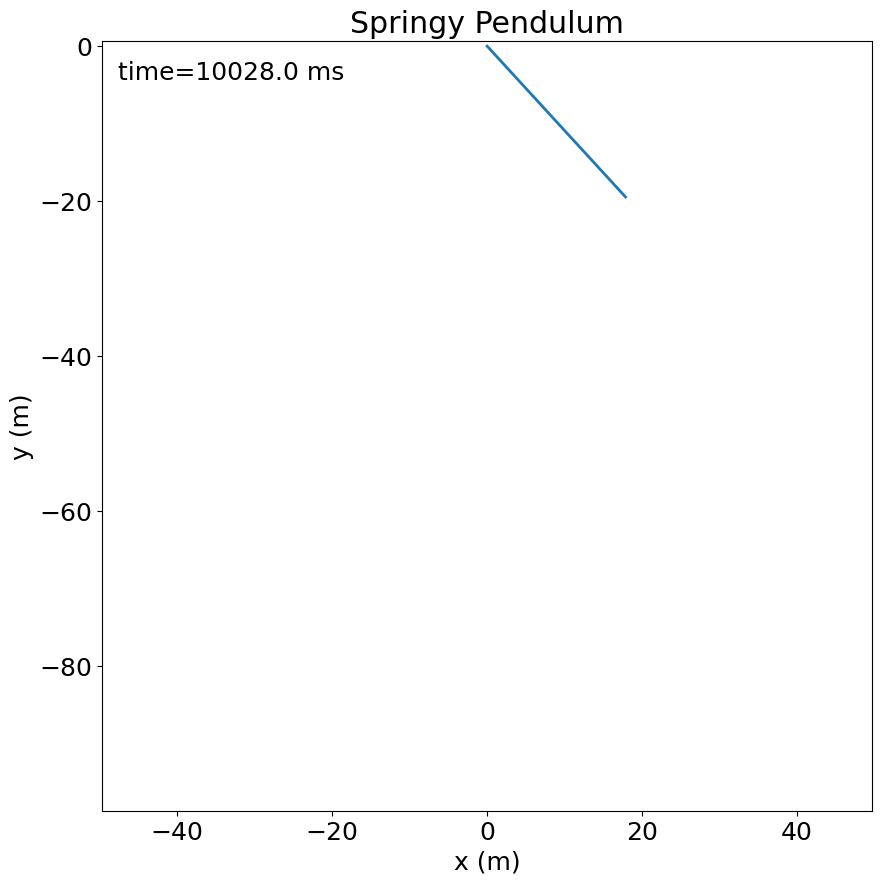

In [10]:
# Now use matplotlib to make an animation of the motion
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(-7.1*b,7.1*b), ylim=(-7.1*b-7*b,7.1*b-7*b))
line, = ax.plot([],[],lw=2)
ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.title("Springy Pendulum")
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_step = 1000.*(t1-t0)/N/10.    # Speed up time by a factor of 10 here

def init():
    line.set_data([],[])
    time_text.set_text('')
    return line, time_text

def animate(i):
    XP = [0.,X[i]]
    YP = [0.,Y[i]]
    line.set_data(XP,YP)
    time = i*time_step
    time_text.set_text('time=%.1f ms' % time)
    return line, time_text

# The animation is created here    
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=N, interval=time_step, blit=True)

# Save the animation to an mpeg file. This requires ffmpeg to be installed,
# with the executable in the PATH
anim.save('doublePendulumk.mp4', fps=30, extra_args=['-vcodec', 'libx264'] ) #extra_args=['-vcodec', 'libx264']
   
# Display the animation
plt.show()